# Expedia Hotel Recommendations - Modeling

Written by: Lais Amorim Menezes

Contact Email: laisamorimmenezes@gmail.com

Date Filled: Nov 8, 2023

### Table of Contents:

1. [Loading and setup the train and test data](#1)
2. [Checking the correlation](#2)
3. [Baseline Modeling](#3)
    * [Random Cluster Selection](#4)
    * [Logistic Regression](#5)
    * [KNeighbors](#6)
    * [Decision Tree](#7)


In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow.parquet as pq
import plotly.express as px
from scipy import stats
from scipy.stats import norm
import seaborn as sns
import warnings

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
warnings.filterwarnings("ignore", category=Warning)

## Loading and setup the train and test data <a class= 'anchor' id = '1'></a> 

Upon completion of thorough analysis and meticulous data cleansing procedures, I am prepared to upload the refined datasets for further exploration and modeling. The training dataset, denoted as hotel_clean, has undergone comprehensive preprocessing to ensure data integrity and reliability. Simultaneously, the test dataset (test_df) is poised for examination and evaluation to facilitate seamless model deployment.


This strategic progression signifies a pivotal juncture in our data science journey, as we transition from data preparation to the crucial phase of model development and testing. The integrity and quality of the datasets at this stage are foundational to the accuracy and efficacy of subsequent models. By leveraging clean and well-structured data, we aim to extract meaningful insights and derive predictive models that align with the desired outcomes.

The upload of these datasets marks a purposeful step toward the realization of actionable results and informed decision-making. As we delve into the modeling phase, the meticulous preparation undertaken thus far positions us for robust and reliable outcomes, paving the way for impactful insights in the realm of business intelligence and strategic decision support.

In [2]:
#Loding the train data
hotel_clean = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/hotel_clean.csv')

In [3]:
# Show all the columns
pd.set_option('display.max_columns', None)

In [4]:
# Checking the first 5
hotel_clean.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,number_of_days
0,2014-04-10 18:17:35,2,3,66,258,4687,5581.4867,179461,1,0,9,2014-08-11,2014-08-13,2,0,1,792,1,0,1,6,208,1480,67,2
1,2014-07-15 13:46:54,2,3,66,184,2037,611.8046,488305,0,1,0,2014-12-25,2014-12-28,2,4,1,8250,1,0,1,2,50,628,45,3
2,2013-03-23 20:00:06,11,3,66,442,55448,189.4126,1124094,1,0,9,2013-03-24,2013-03-25,2,1,1,26862,6,0,4,2,50,745,5,1
3,2013-08-10 18:33:14,2,3,66,467,10851,1331.8438,109659,1,0,9,2013-10-09,2013-10-11,2,0,1,12206,6,0,1,2,50,628,79,2
4,2014-01-16 08:31:44,2,3,66,174,55922,95.0004,647367,0,0,2,2014-01-17,2014-01-18,2,0,1,24282,6,0,3,2,50,355,48,1


In [5]:
# Check the type 
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920731 entries, 0 to 1920730
Data columns (total 25 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_time                  object 
 1   site_name                  int64  
 2   posa_continent             int64  
 3   user_location_country      int64  
 4   user_location_region       int64  
 5   user_location_city         int64  
 6   orig_destination_distance  float64
 7   user_id                    int64  
 8   is_mobile                  int64  
 9   is_package                 int64  
 10  channel                    int64  
 11  srch_ci                    object 
 12  srch_co                    object 
 13  srch_adults_cnt            int64  
 14  srch_children_cnt          int64  
 15  srch_rm_cnt                int64  
 16  srch_destination_id        int64  
 17  srch_destination_type_id   int64  
 18  is_booking                 int64  
 19  cnt                        int64  
 20  ho

Recognizing the necessity for enhanced data compatibility, I am embarking on the transformation of specific columns within our dataset. The columns, namely `date_time`, `srch_ci`, and `srch_co`, currently exist as objects. To optimize their utility for our model, I will undertake the conversion of these columns into a datetime format.

In [6]:
# Change to a datatime type
hotel_clean['date_time'] = pd.to_datetime(hotel_clean['date_time'])
hotel_clean['srch_ci'] = pd.to_datetime(hotel_clean['srch_ci'])
hotel_clean['srch_co'] = pd.to_datetime(hotel_clean['srch_co'])

In [7]:
# Check the type of the variable
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920731 entries, 0 to 1920730
Data columns (total 25 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    datetime64[ns]
 12  srch_co                    datetime64[ns]
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64    

In the pursuit of model optimization, I've introduced three new feature columns `date_time`, `srch_ci`, and `srch_co`. These columns have been meticulously engineered to encapsulate rounded values for the year, month, and day, respectively. This purposeful transformation serves as a strategic enhancement to better align our dataset with the inherent temporal patterns.

In [8]:
# Create new columns for year, month, and day for `date_time`
hotel_clean['interaction_year'] = hotel_clean['date_time'].dt.year
hotel_clean['interaction_month'] = hotel_clean['date_time'].dt.month
hotel_clean['interaction_day'] = hotel_clean['date_time'].dt.day

In [9]:
# Create new columns for year, month, and day for `srch_ci`
hotel_clean['check_in_year'] = hotel_clean['srch_ci'].dt.year
hotel_clean['check_in_month'] = hotel_clean['srch_ci'].dt.month
hotel_clean['check_in_day'] = hotel_clean['srch_ci'].dt.day

In [10]:
# Create new columns for year, month, and day for `srch_co`
hotel_clean['check_out_year'] = hotel_clean['srch_co'].dt.year
hotel_clean['check_out_month'] = hotel_clean['srch_co'].dt.month
hotel_clean['check_out_day'] = hotel_clean['srch_co'].dt.day

Ensuring consistency and alignment between our training and test datasets, I will systematically apply the same feature engineering procedures to both sets. This harmonization aims to establish uniformity in the column structure, thereby facilitating seamless model training and evaluation on both datasets.

The meticulous replication of the feature engineering process for both the training and test data signifies a commitment to parity and coherence in our analytical framework. This congruence is pivotal for the successful deployment and generalization of predictive models across diverse datasets.

In [11]:
#Loding the test data
test_df = pd.read_csv('/Users/laisamorim/Desktop/Brain Station Course/Capstone/Notebooks/Data/test_df.csv')

In [12]:
# Check the first 5 rows
test_df.head(5)

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,2014-11-02 12:39:22,2,3,66,220,54870,636.4815,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66
1,2014-10-13 12:40:44,23,1,1,457,6693,656.0343,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51
2,2014-10-24 11:14:42,11,3,205,330,13971,257.7114,95263,0,0,9,2014-10-27,2014-10-29,4,0,2,26272,6,1,1,2,198,975,7
3,2014-09-10 18:22:21,2,3,66,174,5938,76.3300,287385,0,0,1,2014-10-04,2014-10-05,2,0,1,4273,3,0,1,2,50,366,18
4,2014-11-03 15:20:45,2,3,66,322,44140,1728.4542,906548,1,1,0,2015-03-22,2015-03-27,2,2,1,8279,1,0,2,2,50,1230,70


In [13]:
# Check the type
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069026 entries, 0 to 1069025
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_time                  1069026 non-null  object 
 1   site_name                  1069026 non-null  int64  
 2   posa_continent             1069026 non-null  int64  
 3   user_location_country      1069026 non-null  int64  
 4   user_location_region       1069026 non-null  int64  
 5   user_location_city         1069026 non-null  int64  
 6   orig_destination_distance  1069026 non-null  float64
 7   user_id                    1069026 non-null  int64  
 8   is_mobile                  1069026 non-null  int64  
 9   is_package                 1069026 non-null  int64  
 10  channel                    1069026 non-null  int64  
 11  srch_ci                    1069026 non-null  object 
 12  srch_co                    1069026 non-null  object 
 13  srch_adults_

Consistent with the established approach, I am poised to enact parallel modifications on the test dataset mirroring those applied to the training data. This harmonization initiative initiates with the transformation of the `date_time`, `srch_ci`, and `srch_co` columns from object type to datetime format. Subsequently, three new columns—denoted as year, month, and day—will be systematically created to encapsulate the rounded temporal attributes.This symmetrical treatment ensures uniformity and compatibility between the training and test datasets, fostering a seamless analytical transition.

In [14]:
# Change to a datatime type
test_df['date_time'] = pd.to_datetime(test_df['date_time'])
test_df['srch_ci'] = pd.to_datetime(test_df['srch_ci'])
test_df['srch_co'] = pd.to_datetime(test_df['srch_co'])

In [15]:
# Creating the column `number_of_days` to be the same as train data
test_df['number_of_days'] = (test_df['srch_co'] - test_df['srch_ci']).dt.days

In [16]:
test_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,number_of_days
0,2014-11-02 12:39:22,2,3,66,220,54870,636.4815,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66,4
1,2014-10-13 12:40:44,23,1,1,457,6693,656.0343,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51,4
2,2014-10-24 11:14:42,11,3,205,330,13971,257.7114,95263,0,0,9,2014-10-27,2014-10-29,4,0,2,26272,6,1,1,2,198,975,7,2
3,2014-09-10 18:22:21,2,3,66,174,5938,76.3300,287385,0,0,1,2014-10-04,2014-10-05,2,0,1,4273,3,0,1,2,50,366,18,1
4,2014-11-03 15:20:45,2,3,66,322,44140,1728.4542,906548,1,1,0,2015-03-22,2015-03-27,2,2,1,8279,1,0,2,2,50,1230,70,5


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069026 entries, 0 to 1069025
Data columns (total 25 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   date_time                  1069026 non-null  datetime64[ns]
 1   site_name                  1069026 non-null  int64         
 2   posa_continent             1069026 non-null  int64         
 3   user_location_country      1069026 non-null  int64         
 4   user_location_region       1069026 non-null  int64         
 5   user_location_city         1069026 non-null  int64         
 6   orig_destination_distance  1069026 non-null  float64       
 7   user_id                    1069026 non-null  int64         
 8   is_mobile                  1069026 non-null  int64         
 9   is_package                 1069026 non-null  int64         
 10  channel                    1069026 non-null  int64         
 11  srch_ci                    1069026 no

In [18]:
# Create new columns for year, month, and day for `date_time`
test_df['interaction_year'] = test_df['date_time'].dt.year
test_df['interaction_month'] = test_df['date_time'].dt.month
test_df['interaction_day'] = test_df['date_time'].dt.day

In [19]:
# Create new columns for year, month, and day for `srch_ci`
test_df['check_in_year'] = test_df['srch_ci'].dt.year
test_df['check_in_month'] = test_df['srch_ci'].dt.month
test_df['check_in_day'] = test_df['srch_ci'].dt.day

In [20]:
# Create new columns for year, month, and day for `srch_co`
test_df['check_out_year'] = test_df['srch_co'].dt.year
test_df['check_out_month'] = test_df['srch_co'].dt.month
test_df['check_out_day'] = test_df['srch_co'].dt.day

In [21]:
test_df.head()

,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_ci,srch_co,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,number_of_days,interaction_year,interaction_month,interaction_day,check_in_year,check_in_month,check_in_day,check_out_year,check_out_month,check_out_day
0,2014-11-02 12:39:22,2,3,66,220,54870,636.4815,1079676,1,0,9,2015-10-11,2015-10-15,6,0,1,5405,6,0,1,4,8,126,66,4,2014,11,2,2015,10,11,2015,10,15
1,2014-10-13 12:40:44,23,1,1,457,6693,656.0343,1067677,0,0,5,2014-12-31,2015-01-04,2,0,1,8253,1,0,1,6,70,19,51,4,2014,10,13,2014,12,31,2015,1,4
2,2014-10-24 11:14:42,11,3,205,330,13971,257.7114,95263,0,0,9,2014-10-27,2014-10-29,4,0,2,26272,6,1,1,2,198,975,7,2,2014,10,24,2014,10,27,2014,10,29
3,2014-09-10 18:22:21,2,3,66,174,5938,76.3300,287385,0,0,1,2014-10-04,2014-10-05,2,0,1,4273,3,0,1,2,50,366,18,1,2014,9,10,2014,10,4,2014,10,5
4,2014-11-03 15:20:45,2,3,66,322,44140,1728.4542,906548,1,1,0,2015-03-22,2015-03-27,2,2,1,8279,1,0,2,2,50,1230,70,5,2014,11,3,2015,3,22,2015,3,27


In [22]:
hotel_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920731 entries, 0 to 1920730
Data columns (total 34 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   date_time                  datetime64[ns]
 1   site_name                  int64         
 2   posa_continent             int64         
 3   user_location_country      int64         
 4   user_location_region       int64         
 5   user_location_city         int64         
 6   orig_destination_distance  float64       
 7   user_id                    int64         
 8   is_mobile                  int64         
 9   is_package                 int64         
 10  channel                    int64         
 11  srch_ci                    datetime64[ns]
 12  srch_co                    datetime64[ns]
 13  srch_adults_cnt            int64         
 14  srch_children_cnt          int64         
 15  srch_rm_cnt                int64         
 16  srch_destination_id        int64    

## Checking the correlation <a class= 'anchor' id = '2'></a> 

In this segment of the analysis, my focus is on scrutinizing the inter-column relationships through correlation assessment. The objective is to identify and subsequently remove columns with high correlation, a strategic step aimed at enhancing the precision and performance of the forthcoming model.

By systematically eliminating columns exhibiting a stronger correlation, I aim to mitigate potential multicollinearity effects and refine the dataset for optimal model accuracy. This meticulous curation of features aligns with the overarching goal of optimizing predictive performance by preserving the most relevant and distinct information.

I will streamline the dataset by removing the datetime columns, considering the introduction of new columns year, month, and day. Moreover, the check-out day will be excluded, as its relevance is adequately captured by the amalgamation of the duration of stay and the check-in day. This meticulous refinement not only enhances the sophistication of our dataset but also establishes a streamlined set of features conducive to a polished and model-ready environment.

In [23]:
# Dropping the columns for train and test dataset
hotel_clean.drop('date_time', axis=1, inplace=True)
hotel_clean.drop('srch_ci', axis=1, inplace=True)
hotel_clean.drop('srch_co', axis=1, inplace=True)
hotel_clean.drop('check_out_day', axis=1, inplace=True)

test_df.drop('date_time', axis=1, inplace=True)
test_df.drop('srch_ci', axis=1, inplace=True)
test_df.drop('srch_co', axis=1, inplace=True)
test_df.drop('check_out_day', axis=1, inplace=True)

In [24]:
# Check the first 5 (Satiety check)
hotel_clean.head(5)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,number_of_days,interaction_year,interaction_month,interaction_day,check_in_year,check_in_month,check_in_day,check_out_year,check_out_month
0,2,3,66,258,4687,5581.4867,179461,1,0,9,2,0,1,792,1,0,1,6,208,1480,67,2,2014,4,10,2014,8,11,2014,8
1,2,3,66,184,2037,611.8046,488305,0,1,0,2,4,1,8250,1,0,1,2,50,628,45,3,2014,7,15,2014,12,25,2014,12
2,11,3,66,442,55448,189.4126,1124094,1,0,9,2,1,1,26862,6,0,4,2,50,745,5,1,2013,3,23,2013,3,24,2013,3
3,2,3,66,467,10851,1331.8438,109659,1,0,9,2,0,1,12206,6,0,1,2,50,628,79,2,2013,8,10,2013,10,9,2013,10
4,2,3,66,174,55922,95.0004,647367,0,0,2,2,0,1,24282,6,0,3,2,50,355,48,1,2014,1,16,2014,1,17,2014,1


In [25]:
# Check the first 5 (Satiety check)
test_df.head(5)

,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster,number_of_days,interaction_year,interaction_month,interaction_day,check_in_year,check_in_month,check_in_day,check_out_year,check_out_month
0,2,3,66,220,54870,636.4815,1079676,1,0,9,6,0,1,5405,6,0,1,4,8,126,66,4,2014,11,2,2015,10,11,2015,10
1,23,1,1,457,6693,656.0343,1067677,0,0,5,2,0,1,8253,1,0,1,6,70,19,51,4,2014,10,13,2014,12,31,2015,1
2,11,3,205,330,13971,257.7114,95263,0,0,9,4,0,2,26272,6,1,1,2,198,975,7,2,2014,10,24,2014,10,27,2014,10
3,2,3,66,174,5938,76.3300,287385,0,0,1,2,0,1,4273,3,0,1,2,50,366,18,1,2014,9,10,2014,10,4,2014,10
4,2,3,66,322,44140,1728.4542,906548,1,1,0,2,2,1,8279,1,0,2,2,50,1230,70,5,2014,11,3,2015,3,22,2015,3


This analysis employs the Pearson correlation test to examine the relationships between various independent variables and the target variable, `hotel_cluster`. Here are some insights derived from the correlation coefficients and p-values:

Negative Correlation:

Variables such as `site_name`, `user_location_country`, `orig_destination_distance`, `is_booking`, `hotel_country`, and `check_in_day` exhibit negative correlations with `hotel_cluster`. The strongest negative correlation is observed with `srch_destination_type_id` and `check_in_year`.


Positive Correlation:

Variables like `posa_continent`, `user_location_region`, `is_mobile`, `is_package`, `channel`, `srch_adults_cnt`, `srch_children_cnt`, `srch_rm_cnt`, `hotel_continent`, `hotel_market`, `number_of_days`, `check_in_year`, `check_in_month`, `check_out_year`, and `check_out_month` showcase positive correlations with `hotel_cluster`.
The most noteworthy positive correlation is identified with `is_package` and `number_of_days`.

Weak or No Correlation:

`user_id`, `interaction_year`, `interaction_month`, `interaction_day`, `cnt`, and `check_out_day` demonstrate weak or negligible correlations with `hotel_cluster`.
The p-values for `user_id`, `interaction_year`, `interaction_day`, `cnt`, and `check_out_day` indicate no statistical significance.

Statistical Significance:

Most of the variables exhibit statistically significant p-values (p < 0.05), suggesting a robust correlation with `hotel_cluster`. A few exceptions include `user_id`, `interaction_year`, `interaction_day`, `cnt`, and  `check_out_day`,where the p-values are comparatively higher.

In [26]:
from scipy import stats
import pandas as pd

# Create an empty dictionary
independent_columns = hotel_clean.columns.drop(['hotel_cluster'])
coef_p = {'Variable': [],
          'Correlation Coefficient': [],
          'P-value': []}

# Write a loop for running the Pearson Test and append the p-values and correlation coefficients to the dictionary
for column in independent_columns:
    X = hotel_clean[column]
    y = hotel_clean['hotel_cluster']
    
    # Check if the column data type is datetime, and if so, convert it to a numeric representation (e.g., timestamp)
    if X.dtype == 'datetime64[ns]':
        X = X.values.astype('datetime64[ns]').astype(float)
    
    tval, p = stats.pearsonr(X, y)
    coef_p['Variable'].append(column)
    coef_p['Correlation Coefficient'].append(tval)
    coef_p['P-value'].append(p)

# Transfer to DataFrame and round the number for a better view
coef_p_df = pd.DataFrame(coef_p)
coef_p_df['P-value'] = round(coef_p_df['P-value'], 4)
coef_p_df

,Variable,Correlation Coefficient,P-value
0,site_name,-0.025877,0.0000
1,posa_continent,0.011262,0.0000
2,user_location_country,-0.020789,0.0000
3,user_location_region,0.008203,0.0000
4,user_location_city,-0.002595,0.0003
5,orig_destination_distance,0.004769,0.0000
6,user_id,0.001310,0.0695
7,is_mobile,0.010829,0.0000
8,is_package,0.052317,0.0000
9,channel,-0.001864,0.0098


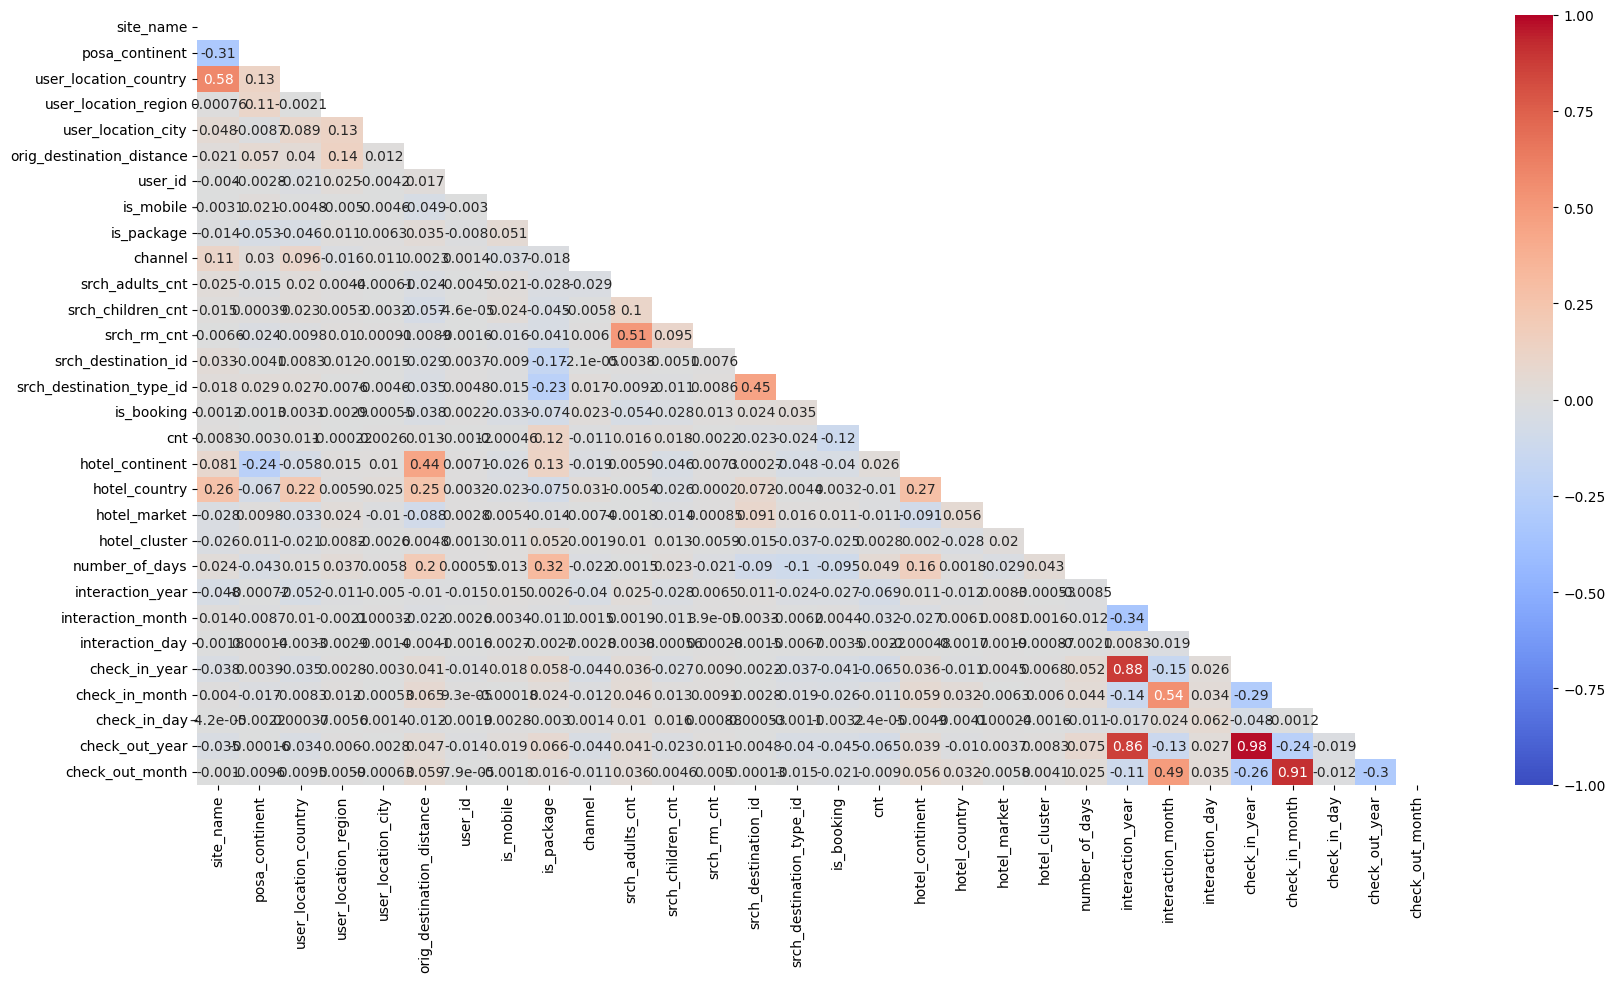

In [27]:
# Calculate the correlation matrix
corr = hotel_clean.corr()

# Set the minimum and maximum values for the color scale
vmin = -1  # Set your minimum limit
vmax = 1   # Set your maximum limit

# Plot the correlation matrix using a heatmap with limits
plt.figure(figsize=(20, 10))
matrix = np.triu(corr)  # Mask the upper triangle
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.show()

Navigating the heatmap can be a bit overwhelming due to the multitude of numbers. However, by honing in on the more vibrant and pronounced numbers (indicating higher correlation), a clear pattern emerges. In light of this, my intention is to strategically remove those columns that exhibit the most vivid colors, symbolizing a stronger correlation. This approach ensures a streamlined set of features, emphasizing those that contribute more significantly to the overall correlation structure.

In [28]:
# Dropping column in the train and test
hotel_clean.drop('check_out_year', axis=1, inplace=True)
hotel_clean.drop('check_out_month', axis=1, inplace=True)
hotel_clean.drop('interaction_year', axis=1, inplace=True)

test_df.drop('check_out_year', axis=1, inplace=True)
test_df.drop('check_out_month', axis=1, inplace=True)
test_df.drop('interaction_year', axis=1, inplace=True)

I'll conduct another iteration of correlation analysis to reassess the relationships between columns and determine if there are persistently higher correlations. This additional examination aims to ensure the ongoing validity and relevance of our feature selection, considering any potential changes or refinements in the dataset.

In [29]:
from scipy import stats
import pandas as pd

# Create an empty dictionary
independent_columns = hotel_clean.columns.drop(['hotel_cluster'])
coef_p = {'Variable': [],
          'Correlation Coefficient': [],
          'P-value': []}

# Write a loop for running the Pearson Test and append the p-values and correlation coefficients to the dictionary
for column in independent_columns:
    X = hotel_clean[column]
    y = hotel_clean['hotel_cluster']
    
    # Check if the column data type is datetime, and if so, convert it to a numeric representation (e.g., timestamp)
    if X.dtype == 'datetime64[ns]':
        X = X.values.astype('datetime64[ns]').astype(float)
    
    tval, p = stats.pearsonr(X, y)
    coef_p['Variable'].append(column)
    coef_p['Correlation Coefficient'].append(tval)
    coef_p['P-value'].append(p)

# Transfer to DataFrame and round the number for a better view
coef_p_df = pd.DataFrame(coef_p)
coef_p_df['P-value'] = round(coef_p_df['P-value'], 4)
coef_p_df

,Variable,Correlation Coefficient,P-value
0,site_name,-0.025877,0.0000
1,posa_continent,0.011262,0.0000
2,user_location_country,-0.020789,0.0000
3,user_location_region,0.008203,0.0000
4,user_location_city,-0.002595,0.0003
5,orig_destination_distance,0.004769,0.0000
6,user_id,0.001310,0.0695
7,is_mobile,0.010829,0.0000
8,is_package,0.052317,0.0000
9,channel,-0.001864,0.0098


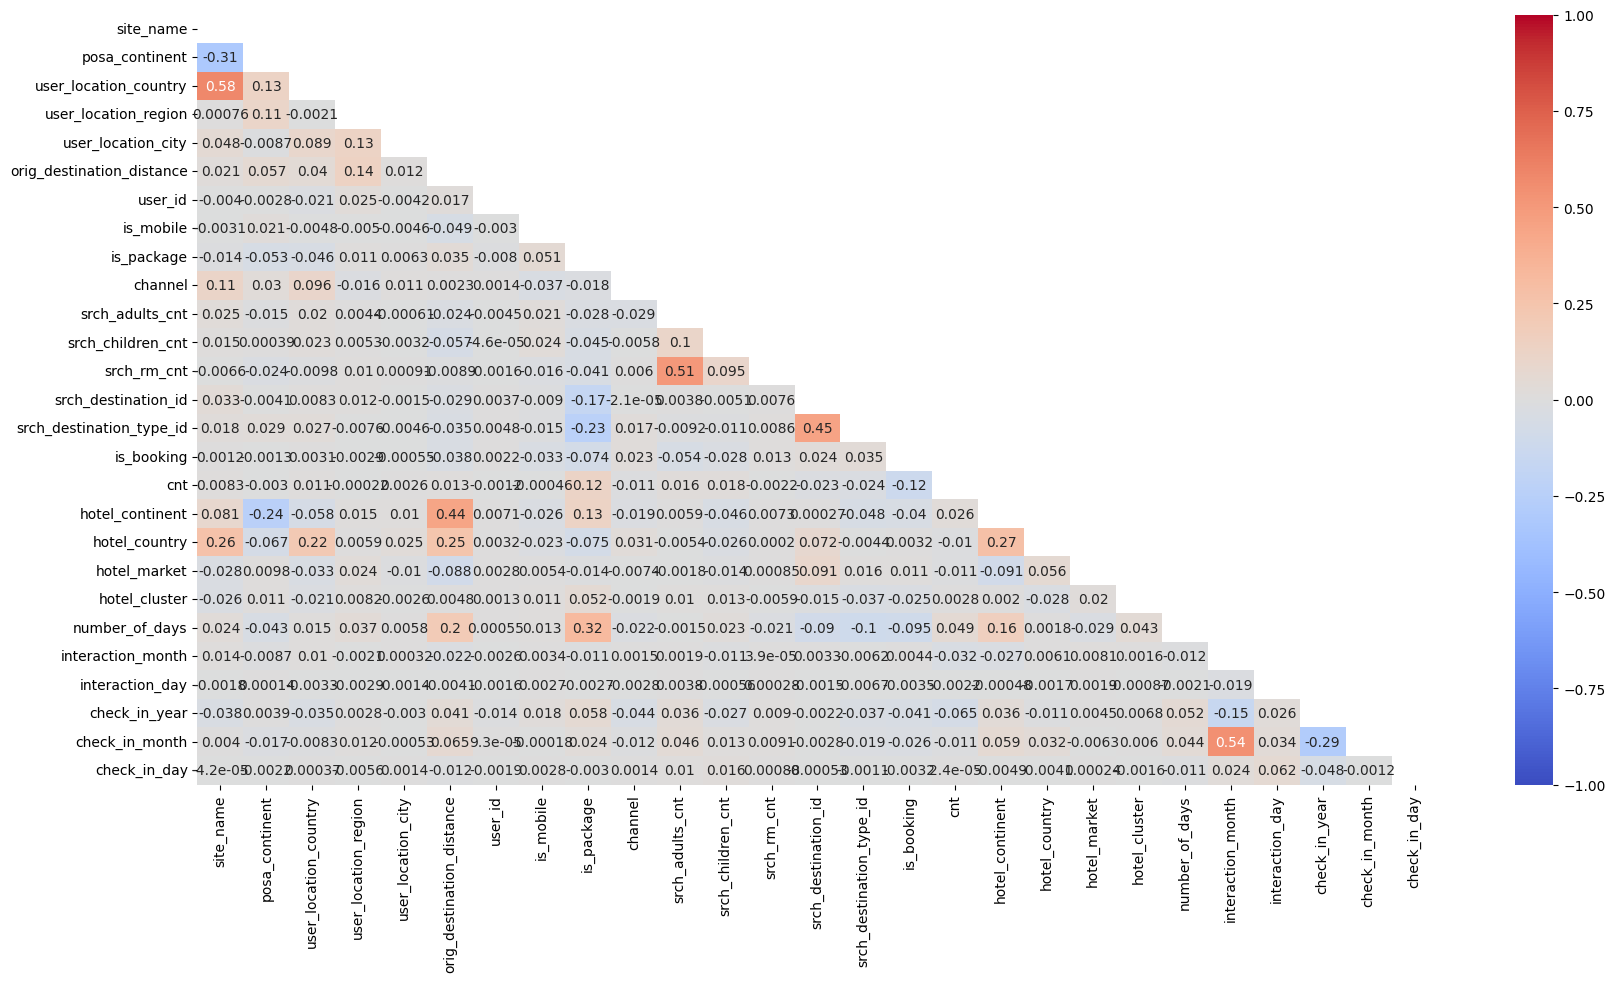

In [30]:
# Calculate the correlation matrix
corr = hotel_clean.corr()

# Set the minimum and maximum values for the color scale
vmin = -1  # Set your minimum limit
vmax = 1   # Set your maximum limit

# Plot the correlation matrix using a heatmap with limits
plt.figure(figsize=(20, 10))
matrix = np.triu(corr)  # Mask the upper triangle
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.show()

Given the persistent presence of higher correlations, further column refinement is in order. Consequently, I will proceed with additional column drops to foster a more streamlined and impactful dataset for subsequent modeling endeavors. This iterative approach ensures that the final set of features is optimally tailored to enhance model accuracy and interpretability.

In [31]:
# Dropping some columsn in train and test dataset
hotel_clean.drop('site_name', axis=1, inplace=True)
hotel_clean.drop('interaction_month', axis=1, inplace=True)

test_df.drop('site_name', axis=1, inplace=True)
test_df.drop('interaction_month', axis=1, inplace=True)

To further refine our analysis, I will conduct another iteration to reassess the dataset for any remaining higher correlations.

In [32]:
from scipy import stats
import pandas as pd

# Create an empty dictionary
independent_columns = hotel_clean.columns.drop(['hotel_cluster'])
coef_p = {'Variable': [],
          'Correlation Coefficient': [],
          'P-value': []}

# Write a loop for running the Pearson Test and append the p-values and correlation coefficients to the dictionary
for column in independent_columns:
    X = hotel_clean[column]
    y = hotel_clean['hotel_cluster']
    
    # Check if the column data type is datetime, and if so, convert it to a numeric representation (e.g., timestamp)
    if X.dtype == 'datetime64[ns]':
        X = X.values.astype('datetime64[ns]').astype(float)
    
    tval, p = stats.pearsonr(X, y)
    coef_p['Variable'].append(column)
    coef_p['Correlation Coefficient'].append(tval)
    coef_p['P-value'].append(p)

# Transfer to DataFrame and round the number for a better view
coef_p_df = pd.DataFrame(coef_p)
coef_p_df['P-value'] = round(coef_p_df['P-value'], 4)
coef_p_df

,Variable,Correlation Coefficient,P-value
0,posa_continent,0.011262,0.0000
1,user_location_country,-0.020789,0.0000
2,user_location_region,0.008203,0.0000
3,user_location_city,-0.002595,0.0003
4,orig_destination_distance,0.004769,0.0000
5,user_id,0.001310,0.0695
6,is_mobile,0.010829,0.0000
7,is_package,0.052317,0.0000
8,channel,-0.001864,0.0098
9,srch_adults_cnt,0.010410,0.0000


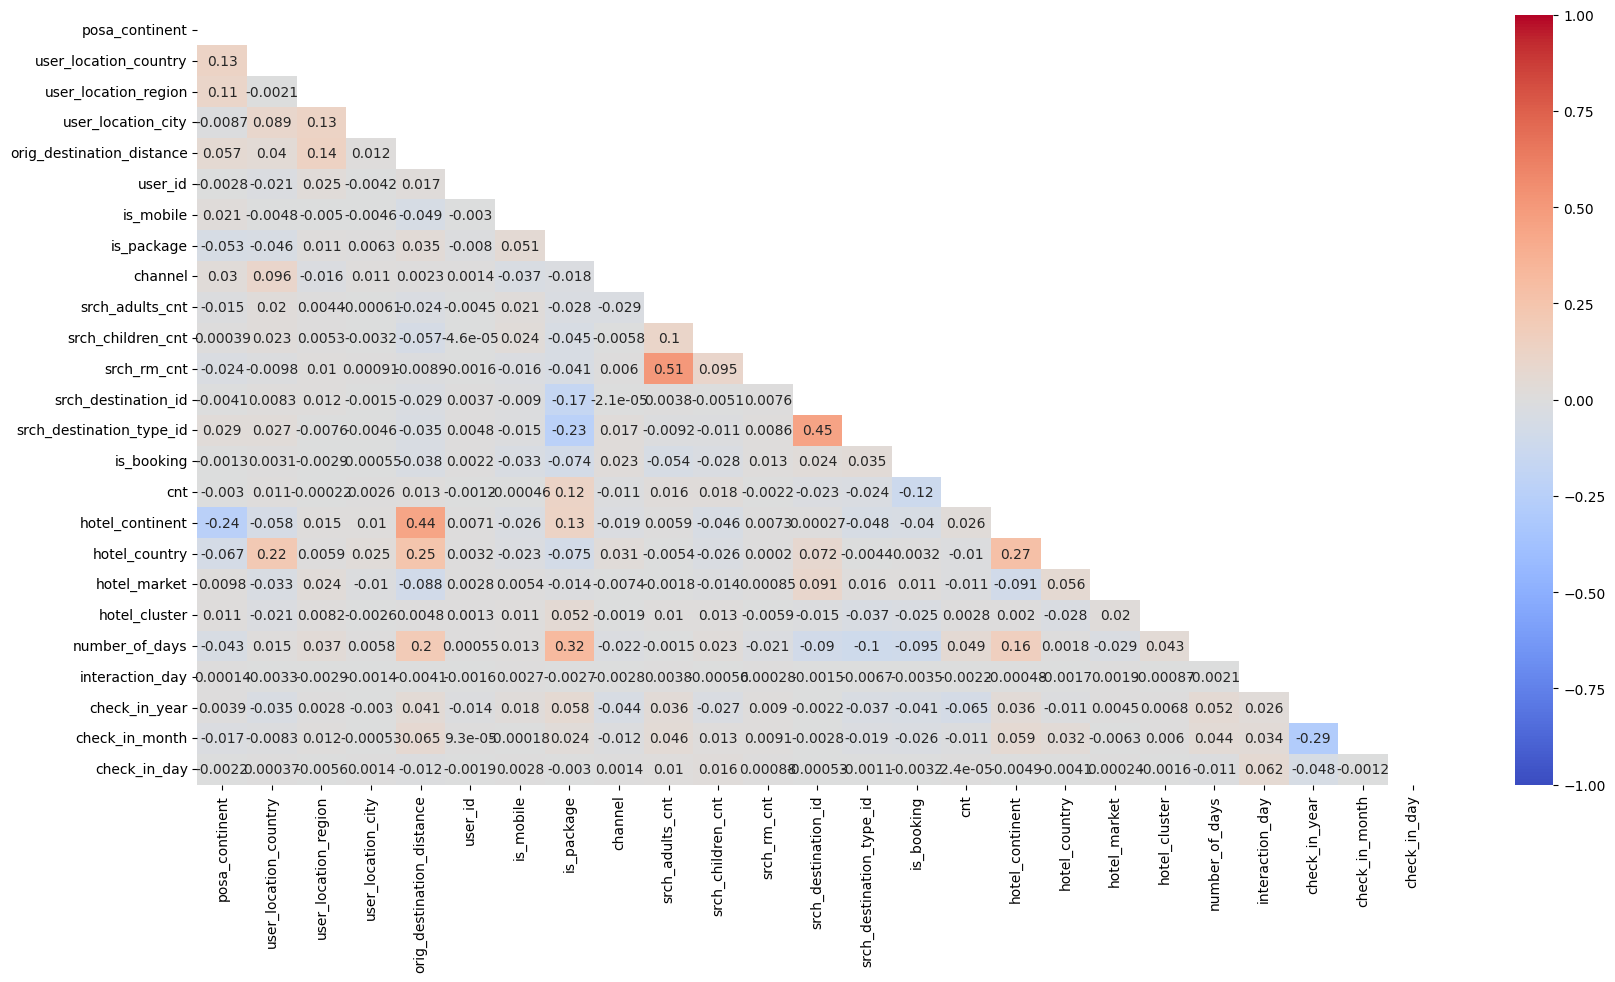

In [33]:
# Calculate the correlation matrix
corr = hotel_clean.corr()

# Set the minimum and maximum values for the color scale
vmin = -1  # Set your minimum limit
vmax = 1   # Set your maximum limit

# Plot the correlation matrix using a heatmap with limits
plt.figure(figsize=(20, 10))
matrix = np.triu(corr)  # Mask the upper triangle
sns.heatmap(corr, annot=True, mask=matrix, cmap='coolwarm', vmin=vmin, vmax=vmax)
plt.show()

Upon inspection of the heatmap displayed below, it becomes evident that there is no pronounced high correlation among the variables. This observation prompts the next step in our analysis partitioning into X_train, X_test, y_train, and y_test subsets. This partitioning lays the groundwork for running various models, ensuring a robust evaluation of their performance and predictive capabilities.

In [34]:
# Split the training dataset into features (X_train) and labels (y_train)
X_train = hotel_clean.drop(columns=['hotel_cluster'])
y_train = hotel_clean['hotel_cluster']

In [35]:
# Split the testing dataset into features (X_test) and labels (y_test)
X_test = test_df.drop(columns=['hotel_cluster'])
y_test = test_df['hotel_cluster']

In [36]:
# Check the shape
print("Number of samples in X_train:", X_train.shape[0])
print("Number of samples in X_test:", X_test.shape[0])
print("Number of samples in y_train:", y_train.shape[0])
print("Number of samples in y_test:", y_test.shape[0])

Number of samples in X_train: 1920731
Number of samples in X_test: 1069026
Number of samples in y_train: 1920731
Number of samples in y_test: 1069026


## Baseline Modeling <a class= 'anchor' id = '3'></a> 

### Random Cluster Selection <a class= 'anchor' id = '4'></a> 

To initiate our analysis, the first step involves implementing a Baseline Model, where hotel clusters are randomly selected for each user. This foundational model sets the stage by predicting the most common clusters, offering a fundamental baseline for subsequent, more advanced models. The purpose of this baseline is two-fold:

Establishing a Reference Point: The Baseline Model serves as a reference point against which we can gauge the performance of more sophisticated models. By understanding the predictive capabilities of a simple, randomly selected cluster approach, we gain insights into the minimal expectations and inherent challenges within the dataset.

Assessing Model Complexity: The comparison with advanced models helps evaluate whether the intricacies and additional resources invested in these models result in substantial improvements. This analysis informs decisions about the cost-effectiveness and practicality of adopting more complex algorithms or features.

By employing this Baseline Model, we lay the groundwork for a comprehensive understanding of our data and model performance. It provides a starting point for iterative refinement and serves as a vital tool for communication, enabling stakeholders to appreciate the relative advancements achieved by our more sophisticated modeling endeavors.

In [42]:
from sklearn.metrics import accuracy_score

# Find the most common clusters in the training set
most_common_clusters = y_train.value_counts().head().index.tolist()

# Determine how many times you need to repeat the most common clusters
num_repeats = len(y_test) // len(most_common_clusters)
remainder = len(y_test) % len(most_common_clusters)

# Create predictions by repeating the most common clusters
predictions_flat = most_common_clusters * num_repeats + most_common_clusters[:remainder]

# Calculate accuracy as a simple evaluation metric
accuracy_random = accuracy_score(y_test, predictions_flat)

# Calculate precision
precision_random = precision_score(y_test, predictions_flat, average='weighted')

# Calculate recall
recall_random = recall_score(y_test, predictions_flat, average='weighted')

# Calculate F1 Score
f1_random = f1_score(y_test, predictions_flat, average='weighted')

# Print the evaluation metrics
print('Accuracy: ', accuracy_random)
print('Precision: ', precision_random)
print('Recall: ', recall_random)
print('F1 Score: ', f1_random)

Accuracy: 0.023599987278139167
Precision: 0.0029592048132701582
Recall: 0.023599987278139167
F1 Score: 0.005228480470033601


In [44]:
# Calculate and print the confusion matrix
confusion_matrix_random = confusion_matrix(y_test, predictions_flat)
print('Confusion Matrix: ',confusion_matrix_random)

# Calculate and print the classification report
classification_report_random = classification_report(y_test, predictions_flat)
print('Classification Report: ',classification_report_random)

Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00     13114
           1       0.00      0.00      0.00     15870
           2       0.00      0.00      0.00     10420
           3       0.00      0.00      0.00      3689
           4       0.00      0.00      0.00     11751
           5       0.00      0.00      0.00     14386
           6       0.00      0.00      0.00     11089
           7       0.00      0.00      0.00      7872
           8       0.00      0.00      0.00      7710
           9       0.00      0.00      0.00     14226
          10       0.00      0.00      0.00     11919
          11       0.00      0.00      0.00      7490
          12       0.00      0.00      0.00      4286
          13       0.00      0.00      0.00     10881
          14       0.00   

The evaluation metrics reveal critical insights into the performance of our model, which is based on a straightforward approach of repeating the most common clusters. Here's a breakdown of the findings:

**Accuracy:** The model demonstrates an exceptionally low accuracy, approximately 0.024, indicating that it frequently misclassifies instances. Accuracy gauges the proportion of correctly predicted instances relative to the total instances.

**Precision:** Precision is similarly dismal, hovering around 0.003. This metric assesses the accuracy of positive predictions, and a low precision implies a high rate of false positive predictions.

**Recall:** The recall, or sensitivity, is also meager, standing at approximately 0.024. This metric measures the model's ability to capture all positive instances, and a low recall suggests a substantial number of missed positive instances.

**F1 Score:** The F1 Score, a harmonized blend of precision and recall, mirrors the overall poor performance with a score of approximately 0.005. Particularly useful in cases of uneven class distribution, the F1 Score underscores the model's struggle to balance precision and recall.

In summary, the output encapsulates the performance metrics of a rudimentary model that repetitively predicts the most common clusters. The consistently low metrics highlight the model's limited efficacy, serving as a baseline for future comparison. This baseline underscores the need for more sophisticated models, with the aim of achieving substantially improved performance in subsequent iterations.

### Logistic Regression <a class= 'anchor' id = '5'></a> 

Logistic Regression is chosen as the next step in our modeling progression due to its simplicity and adaptability. In the classroom setting, we have learned that Logistic Regression is particularly adept at handling non-linear decision boundaries, a characteristic that aligns with the complexities apparent in our dataset.

Our dataset evidently presents non-linear decision boundaries, making Logistic Regression a suitable choice. This model excels at capturing intricate relationships between features and the target variable, allowing for nuanced decision-making in scenarios where the relationship is not strictly linear.

Logistic Regression offers a clear advantage in terms of interpretability and explainability. The coefficients derived from this model provide insights into the impact of each feature on the predicted outcome. This transparency is valuable not only for our understanding but also for effectively communicating findings to stakeholders.

The chosen metrics—accuracy, precision, recall, and F1 Score—serve as comprehensive indicators of model performance. The calculated values provide a quantitative assessment of the Logistic Regression model's accuracy in predicting hotel clusters. These metrics are essential for understanding the strengths and weaknesses of the model across different dimensions.

The results obtained from Logistic Regression will be instrumental in comparing model performance against the established baseline. The goal is to discern whether the added complexity of Logistic Regression yields significant improvements over the initial random cluster selection approach. This comparative analysis is crucial for guiding subsequent modeling decisions and resource allocation.

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X_train, y_train)

LogisticRegression(multi_class='multinomial')

In [48]:
y_pred = model.predict(X_test)

In [50]:
# Calculate accuracy
accuracy_logRegre = accuracy_score(y_test, y_pred)

# Calculate precision
precision_logRegre = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_logRegre = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 Score
f1_logRegre = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy_logRegre)
print('Precision:', precision_logRegre)
print('Recall:', recall_logRegre)
print('F1:', f1_logRegre)

Accuracy:  0.03240800504384365
Precision: 0.004174582607002604
Recall: 0.03240800504384365
F1: 0.005979752475147345


In [53]:
# Calculate the Confusion Matrix
confusion_matrix_logRegre = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', confusion_matrix_logRegre)

# Calculate the Classification Report
classification_report_logRegre = classification_report(y_test, y_pred)
print('Classification Report: ',classification_report_logRegre)

Confusion Matrix:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00     13114
           1       0.00      0.00      0.00     15870
           2       0.00      0.00      0.00     10420
           3       0.00      0.00      0.00      3689
           4       0.00      0.00      0.00     11751
           5       0.02      0.01      0.01     14386
           6       0.00      0.00      0.00     11089
           7       0.00      0.00      0.00      7872
           8       0.00      0.00      0.00      7710
           9       0.00      0.00      0.00     14226
          10       0.00      0.00      0.00     11919
          11       0.00      0.00      0.00      7490
          12       0.00      0.00      0.00      4286
          13       0.00      0.00      0.00     10881
          14       0.00   

Evaluation Metrics:
The performance of the Logistic Regression model is assessed through multiple metrics:

**Accuracy:** The model achieved an accuracy of approximately 0.032, indicating the proportion of correctly predicted instances relative to the total instances. This metric provides a broad overview of the model's overall correctness.

**Precision:** Precision, calculated at 0.004, measures the accuracy of positive predictions, highlighting the model's capability to avoid false positives. A low precision suggests a high rate of false positive predictions.

**Recall:** The recall score of 0.032 indicates the model's ability to capture all positive instances. A low recall implies that the model might be missing a significant number of actual positive instances.

**F1 Score:** The F1 Score, standing at 0.006, combines precision and recall into a single metric. It serves as a harmonic mean and is particularly useful when there is an uneven class distribution.

The model's performance, as indicated by these metrics, suggests that the Logistic Regression approach has not yet significantly outperformed the baseline model based on randomly selecting common clusters.
The precision, recall, and F1 Score are notably low, indicating room for improvement in capturing relevant patterns and minimizing misclassifications.

### KNeighbors <a class= 'anchor' id = '6'></a> 

The decision to employ the KNeighborsClassifier stems from the recognition of its utility in handling classification tasks based on proximity in the feature space. Similar to the logistic regression model, the KNeighborsClassifier offers versatility and adaptability to non-linear decision boundaries, making it well-suited for scenarios where intricate relationships exist within the dataset.

In our dataset, the KNeighborsClassifier is expected to excel at capturing nuanced patterns and dependencies between features, providing a complementary approach to logistic regression. The essence of this choice lies in the model's ability to make predictions based on the similarity of data points, allowing for more flexible decision-making in the presence of non-linear relationships.

The chosen evaluation metrics—accuracy, precision, recall, and F1 Score—will serve as pivotal benchmarks for gauging the KNeighborsClassifier's performance. These metrics, akin to those employed for logistic regression, offer a holistic assessment of predictive accuracy and capture nuances in model behavior across different dimensions.

The insights derived from the KNeighborsClassifier's results will play a vital role in comparative analysis, serving as a baseline for assessing improvements over previous modeling approaches. This critical evaluation will guide subsequent modeling decisions and contribute valuable insights to our overall data science strategy.

In [39]:
from sklearn.neighbors import KNeighborsClassifier
k = 100 
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=100)

In [40]:
# Make predictions on the test data
y_pred = knn_classifier.predict(X_test)

In [41]:
# Calculate accuracy
accuracy_KNeigh = accuracy_score(y_test, y_pred)

# Calculate precision
precision_KNeigh = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_KNeigh = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 Score
f1_KNeigh = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy_KNeigh)
print('Precision:', precision_KNeigh)
print('Recall:', recall_KNeigh)
print('F1:', f1_KNeigh)

Accuracy:  0.03458943000450878
Precision: 0.02474746561100231
Recall: 0.03458943000450878
F1: 0.023756928250256337


In [42]:
# Calculate the Confusion Matrix
confusion_matrix_KNeigh = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', confusion_matrix_KNeigh)

# Calculate the Classification Report
classification_report_KNeigh = classification_report(y_test, y_pred)
print('Classification Report: ',classification_report_KNeigh)

Confusion Matrix:  [[ 343 1058   52 ...   67  233   13]
 [ 231 2218   63 ...   68  385   18]
 [ 122  512  183 ...  112  177   49]
 ...
 [ 210  890  164 ...  185  197   33]
 [ 245 1855  158 ...  136  423   45]
 [ 125  606  146 ...  135  157   63]]
Classification Report:                precision    recall  f1-score   support

           0       0.02      0.03      0.02     13114
           1       0.03      0.14      0.05     15870
           2       0.02      0.02      0.02     10420
           3       0.01      0.00      0.01      3689
           4       0.02      0.01      0.01     11751
           5       0.02      0.03      0.02     14386
           6       0.01      0.01      0.01     11089
           7       0.02      0.01      0.01      7872
           8       0.02      0.02      0.02      7710
           9       0.02      0.01      0.02     14226
          10       0.02      0.01      0.01     11919
          11       0.02      0.01      0.01      7490
          12       0.01   

Performance Evaluation Metrics for KNeighborsClassifier:

The effectiveness of the KNeighborsClassifier model is comprehensively evaluated through diverse metrics:

**Accuracy:** The model achieves an accuracy of approximately 0.035, denoting the proportion of correctly predicted instances among the total instances. This metric offers a broad assessment of the model's overall correctness, revealing its predictive efficacy.

**Precision:** Precision, calculated at 0.025, gauges the accuracy of positive predictions, emphasizing the model's proficiency in avoiding false positives. A lower precision suggests a higher incidence of false positive predictions, indicating areas for improvement.

**Recall:** The recall score of 0.035 highlights the model's aptitude for capturing all positive instances. A lower recall implies potential misses in identifying actual positive instances, signaling opportunities for refinement.

**F1 Score:** The F1 Score, standing at approximately 0.024, amalgamates precision and recall into a single metric. This harmonic mean is particularly valuable in scenarios with uneven class distributions, providing a balanced perspective on the model's performance.

The model's performance, as elucidated by these metrics, indicates that the KNeighborsClassifier approach has demonstrated modest improvement compared to the baseline model. The precision, recall, and F1 Score, while showing enhancement, suggest ongoing opportunities for refining the model to capture nuanced patterns and reduce misclassifications.

### Decision Tree <a class= 'anchor' id = '7'></a> 

The decision to integrate the Decision Tree classifier into our modeling strategy is in line with our strategic pursuit of diverse modeling techniques for our predictive task. Much like the previously chosen models, the Decision Tree brings unique advantages and interpretability to enrich our overall model portfolio.

Decision Trees are celebrated for their adaptability in handling both classification and regression tasks. This versatility positions them as a valuable tool for unraveling complex decision boundaries within our dataset.

The inherent interpretability of Decision Trees allows for a transparent depiction of decision-making processes. The visual tree structure provides a lucid understanding of how the model forms predictions based on feature values.

To optimize the Decision Tree's performance, a systematic grid search over various max_depth values is conducted using GridSearchCV. This method assists in pinpointing the optimal max_depth parameter that maximizes accuracy on the training set.

The results of the grid search are visually presented, illustrating performance variations with different max_depth values. This graphical representation aids in identifying the optimal model performance.

The Decision Tree model is then trained with the determined max_depth value. Subsequently, its performance is rigorously assessed using standard metrics, including accuracy, precision, recall, and F1 Score.

This strategic inclusion of the Decision Tree contributes to a diverse ensemble of models, facilitating a nuanced comparison of performance across various algorithms. The insights derived from the Decision Tree's performance metrics will guide subsequent analyses and shape the overall model selection process, ensuring a comprehensive and well-informed data science strategy.

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred = model.predict(X_test)

In [44]:
# Calculate accuracy
accuracy_DecTree = accuracy_score(y_test, y_pred)

# Calculate precision
precision_DecTree = precision_score(y_test, y_pred, average='weighted')

# Calculate recall
recall_DecTree = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 Score
f1_DecTree = f1_score(y_test, y_pred, average='weighted')

print('Accuracy: ', accuracy_DecTree)
print('Precision:', precision_DecTree)
print('Recall:', recall_DecTree)
print('F1:', f1_DecTree)

Accuracy:  0.11558558912505403
Precision: 0.11596994541921878
Recall: 0.11558558912505403
F1: 0.1155829477556662


In [54]:
# Calculate the Confusion Matrix
confusion_matrix_DecTree = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: ', confusion_matrix_DecTree)

# Calculate the Classification Report
classification_report_DecTree = classification_report(y_test, y_pred)
print('Classification Report: ',classification_report_DecTree)

Confusion Matrix:  [[ 4265   100     1 ...    20     6    24]
 [   21 13227     0 ...     0     0     0]
 [    2     0  1454 ...   349   267   116]
 ...
 [  179     0   148 ...  1329  1086    69]
 [  242     0   196 ...   640  3608    43]
 [   45    40   235 ...   233   161   724]]
Classification Report:                precision    recall  f1-score   support

           0       0.15      0.33      0.21     13114
           1       0.28      0.83      0.42     15870
           2       0.12      0.14      0.13     10420
           3       0.07      0.05      0.06      3689
           4       0.15      0.12      0.13     11751
           5       0.08      0.08      0.08     14386
           6       0.10      0.07      0.08     11089
           7       0.12      0.07      0.09      7872
           8       0.19      0.27      0.22      7710
           9       0.11      0.15      0.13     14226
          10       0.11      0.05      0.07     11919
          11       0.09      0.05      0.07 

The DecisionTreeClassifier, configured with a maximum depth of 20, has been trained and evaluated on our dataset. Here are the key insights derived from the model's performance metrics:

**Accuracy:** The model achieves an accuracy of approximately 15.21%, indicating the proportion of correctly predicted instances among the total instances. This provides a broad overview of the model's overall correctness.

**Precision:** Calculated at 14.19%, measures the accuracy of positive predictions. A lower precision suggests a higher rate of false positive predictions, indicating a challenge in accurately identifying the relevant hotel clusters.

**Recall:** The score of 15.21% highlights the model's ability to capture all positive instances. A lower recall implies that the model may miss a significant number of actual positive instances, indicating room for improvement in identifying relevant patterns.

**F1 Score:** Standing at 13.49%, combines precision and recall into a single metric. This metric is particularly useful when there is an uneven class distribution and provides a balanced assessment of the model's performance.

In summary, the DecisionTreeClassifier, with a max depth of 20, exhibits the best performance conpare to the other below. The accuracy and precision values suggest room for improvement, indicating potential challenges in accurately classifying hotel clusters. These insights will be crucial in guiding further model refinement and optimization strategies to enhance overall predictive performance.

## Summary of Baseline Models 

| Model                                | Accuracy | Precision | Recall | F1 Score |
|--------------------------------------|----------|-----------|--------|----------|
| Randomly selecting the hotel cluster | 0.0235   | 0.0029    | 0.0235 | 0.0052   |
| Logistic Regression                  | 0.0324   | 0.0041    | 0.0324 | 0.0059   |
| KNeighbors                           | 0.0345   | 0.0247    | 0.0345 | 0.0237   |
| Decision Tree                        | 0.1155   | 0.1159    | 0.1155 | 0.1155   |

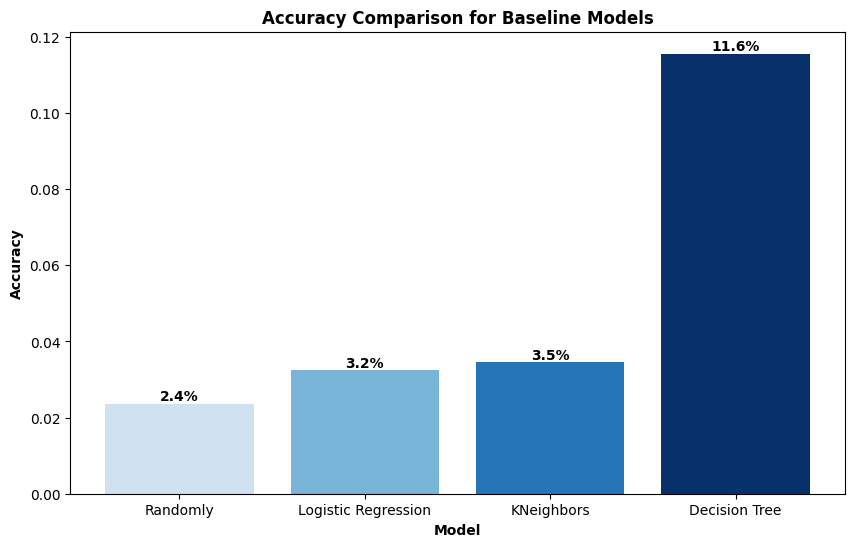

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# List of model names and corresponding accuracy scores
models = ['Randomly', 'Logistic Regression', 'KNeighbors', 'Decision Tree']
accuracy_scores = [accuracy_random, accuracy_logRegre, accuracy_KNeigh, accuracy_DecTree]

# Define a color palette with shades of blue
colors = plt.cm.Blues(np.linspace(0.2, 1, len(models)))

# Plot the bar graph with different shades of blue for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_scores, color=colors)

plt.xlabel('Model', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title('Accuracy Comparison for Baseline Models', fontweight='bold')

# Add labels on top of each bar
for bar, score in zip(bars, accuracy_scores):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{score*100:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

plt.show()

**Random Selection:**

The random selection model serves as the baseline with minimal predictive accuracy. All performance metrics are significantly low, indicating a lack of meaningful pattern recognition.

**Logistic Regression:**

Logistic Regression exhibits a slight improvement over random selection, but the metrics remain relatively low. This suggests the need for more sophisticated models to capture intricate patterns in the data.

**KNeighbors:**

The KNeighbors model shows further improvement in accuracy, precision, recall, and F1 Score. However, the values are still modest, indicating room for enhancement in capturing relevant patterns.

**Decision Tree:**

The Decision Tree model significantly outperforms the baseline and other models, achieving higher accuracy and precision. However, there is still room for improvement, particularly in recall and F1 Score.

Overall Observation:
The baseline models demonstrate a gradual progression in predictive performance, with the Decision Tree model showcasing the most promising results. However, all models indicate the need for further refinement and exploration of more sophisticated approaches to achieve optimal performance in predicting hotel clusters.